#### Demostración de info para hallar ángulo de fase de la fuente 

In [44]:
with open("IEEE34_form1_loads.atp", "r+") as f:
    lines = f.readlines()
lines_copy = lines.copy()
for idx, line in enumerate(lines_copy):
    if 'C Load' in line:
        if '3f' in line:
            print(line, end='')
            print(f" Fase A carga trifásica/bifásica: {lines_copy[idx + 1]}", end='')
            print(f" Fase B carga trifásica/bifásica: {lines_copy[idx + 2]}", end='')
            print(f" Fase C carga trifásica/bifásica: {lines_copy[idx + 3]}", end='')
        else:
            print(line, end='')
            print(f" Fase A carga monofásica: {lines_copy[idx + 1]}", end='')



C Load 860 3fy
 Fase A carga trifásica/bifásica:   X0072A                      6300.9146341    5040.7317073                     0
 Fase B carga trifásica/bifásica:   X0072B                      6300.9146341    5040.7317073                     0
 Fase C carga trifásica/bifásica:   X0072C                      6300.9146341    5040.7317073                     0
C Load 840 3fy
 Fase A carga trifásica/bifásica:   N840A                       14307.923077    11128.384615                     0
 Fase B carga trifásica/bifásica:   N840B                       14307.923077    11128.384615                     0
 Fase C carga trifásica/bifásica:   N840C                       14307.923077    11128.384615                     0
C Load 844 3f
 Fase A carga trifásica/bifásica:   N844A                       953.86153846    741.89230769                     0
 Fase B carga trifásica/bifásica:   N844B                       953.86153846    741.89230769                     0
 Fase C carga trifásica/bifásica:   

In [193]:
import numpy as np
import matplotlib.pyplot as plt
load_low = 80
load_high = 120
max_load_step = 5
events_amount = 1000

initial_load_values = np.around(np.random.uniform(load_low, load_high, events_amount), 2)
counts, bins = np.histogram(initial_load_values)

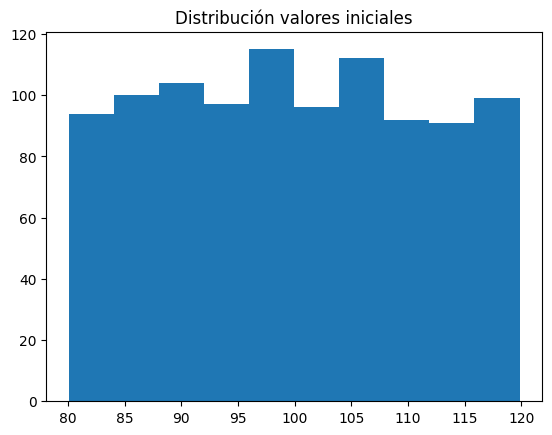

In [194]:

plt.hist(bins[:-1], bins, weights=counts)
plt.title('Distribución valores iniciales')

plt.show()

In [195]:
load_values = initial_load_values.copy()
print(load_values[600])
print(initial_load_values[600])
initial_load_values[600] = 0.5
print(load_values[600])
print(initial_load_values[600])


higher_values_idx = np.where(load_values > load_high - max_load_step)
higher_values = initial_load_values[higher_values_idx]
load_values = np.delete(load_values, higher_values_idx)


82.93
82.93
82.93
0.5


In [196]:
lower_values_idx = np.where(load_values < load_low + max_load_step)
lower_values = initial_load_values[lower_values_idx]
load_values = np.delete(load_values, lower_values_idx)


In [197]:
def target_load(initial_load: np.ndarray, load_high: float, load_low: float, max_load_step: float)-> float:
    """Takes initual load perctentage and returns target load percentage

    Parameters
    ----------
    initial_load : np.ndarray
        Initial load percentage
    load_high : float
        Upper load percentage limit.
    load_low : float
        Lower load percentage limit.
    max_load_step : float
        Max percentage difference between initial_load and target load

    Returns
    -------
    float
        target load percentage
    """
    max_val = initial_load + max_load_step
    min_val = initial_load - max_load_step
    if initial_load > load_high - max_load_step:
        return np.random.uniform(min_val, load_high)
    elif initial_load < load_low + max_load_step:
        return np.random.uniform(load_low, max_val)
    else:
        return np.random.uniform(min_val, max_val)

target_load_vect = np.vectorize(target_load)

In [198]:
final_values = target_load_vect(initial_load_values, load_high, load_low, max_load_step)
final_values = np.around(final_values, 2)

In [205]:
print(np.where(final_values > load_high - max_load_step)[0].shape)

(110,)


In [204]:
print(np.where(initial_load_values > load_high - max_load_step)[0].shape)

(118,)


(1000,)


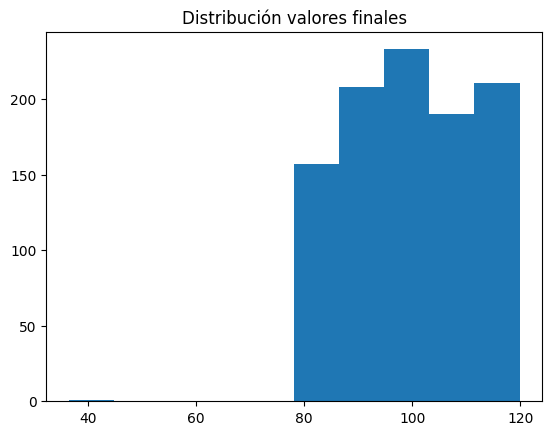

In [208]:

counts, bins = np.histogram(final_values)
plt.hist(bins[:-1], bins, weights=counts)
plt.title('Distribución valores finales')

plt.show()